## About Data

## Code

### Import libraries

In [1]:
import os
import random
import librosa
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

In [2]:
#@title Assign Numbers to Classes
classes = {
    'normal': 0, # Normal Heartbeat Sound
    'murmur': 1, # Murmur Heartbeat Sound
    'extrahs': 2, # Extra Heart Sound
    'extrastole': 3, # Extrasystole Heartbeat Sound
    'artifact': 4 # Artifact sound
}

In [3]:
#@title Folder Paths Dataset A
folder_paths_a = {
    'normal': './data/train/dataset_a/Atraining_normal',
    'murmur': './data/train/dataset_a/Atraining_murmur',
    'extrahs': './data/train/dataset_a/Atraining_extrahs',
    'artifact': './data/train/dataset_a/Atraining_artifact'
}

In [4]:
#@title Folder Paths Dataset B
folder_paths_b = {
    'normal': './data/train/dataset_b/Btraining_normal',
    'murmur': './data/train/dataset_b/Btraining_murmur',
    'extrastole': './data/train/dataset_b/Btraining_extrastole'
}

### Load Data

In [33]:
def load_data(folder_path, cl):
    x = []
    y = []
    samples_rate = []

    file_names = os.listdir(folder_path)
    
    for file_name in file_names:
        try:
            file_path = os.path.join(folder_path, file_name)
        except:
            print(f"Error loading data of '{folder_path}'")
        else:
            audio, sr = librosa.load(file_path, sr=None)
            x.append(audio)
            label = classes.get(cl)
            y.append(label)
            samples_rate.append(sr)
            
    return x, y, samples_rate

In [57]:
# Dataset A
normal_a_data, normal_a_labels, normal_a_sr = load_data(folder_paths_a.get('normal'), classes.get('normal'))
murmur_a_data, murmur_a_labels, murmur_a_sr = load_data(folder_paths_a.get('murmur'), classes.get('murmur'))
extrahs_data, extrahs_labels, extrahs_sr = load_data(folder_paths_a.get('extrahs'), classes.get('extrahs'))
artifact_data, artifact_labels, artifact_sr = load_data(folder_paths_a.get('artifact'), classes.get('artifact'))
# Dataset B
normal_b_data, normal_b_labels, normal_b_sr = load_data(folder_paths_b.get('normal'), classes.get('normal'))
murmur_b_data, murmur_b_murmur, murmur_b_sr = load_data(folder_paths_b.get('murmur'), classes.get('murmur'))
extrastole_data, extrastole_labels, extrastole_sr = load_data(folder_paths_b.get('extrastole'), classes.get('extrastole'))

### Data Visualization

In [58]:
# Num data per class set A
num_normal_a = len(normal_a_data)
num_murmur_a = len(murmur_a_data)
num_extrahs = len(extrahs_data)
num_artifact = len(artifact_data)
# Num data per class set B
num_normal_b = len(normal_b_data)
num_murmur_b = len(murmur_b_data)
num_extrastole = len(extrastole_data)

print('DATASET A')
print(f'Normal class: {num_normal_a} - Average sample rates: {np.mean(normal_a_sr)}')
print(f'Murmur class: {num_murmur_a} - Average sample rates: {np.mean(murmur_a_sr)}')
print(f'Extrahs class: {num_extrahs} - Average sample rates: {np.mean(extrahs_sr)}')
print(f'Artifact class: {num_artifact} - Average sample rates: {np.mean(artifact_sr)}')
print('\n')
print('DATASET B')
print(f'Normal class: {num_normal_b} - Average sample rates: {np.mean(normal_b_sr)}')
print(f'Murmur class: {num_murmur_b} - Average sample rates: {np.mean(murmur_b_sr)}')
print(f'Extrastole class: {num_extrastole} - Average sample rates: {np.mean(extrastole_sr)}')

DATASET A
Normal class: 31 - Average sample rates: 44100.0
Murmur class: 34 - Average sample rates: 44100.0
Extrahs class: 19 - Average sample rates: 44100.0
Artifact class: 40 - Average sample rates: 44100.0


DATASET B
Normal class: 200 - Average sample rates: 4000.0
Murmur class: 66 - Average sample rates: 4000.0
Extrastole class: 46 - Average sample rates: 4000.0


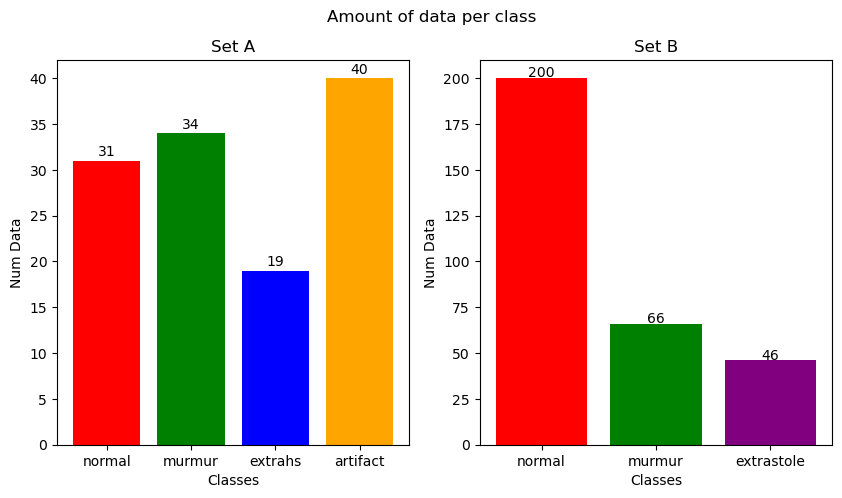

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Amount of data per class')
# Bar Graph Dataset A
axs[0].bar(['normal', 'murmur', 'extrahs', 'artifact'], [num_normal_a, num_murmur_a, num_extrahs, num_artifact], color=['red', 'green', 'blue', 'orange']
)
for i, v in enumerate([num_normal_a, num_murmur_a, num_extrahs, num_artifact]):
    axs[0].text(i, v + 0.5, str(v), color='black', ha='center')
# Set title subplot A
axs[0].set_title('Set A')
# Set labels subplot A
axs[0].set(xlabel='Classes', ylabel='Num Data')
# Bar Graph Dataset B
axs[1].bar(['normal', 'murmur', 'extrastole'], [num_normal_b, num_murmur_b, num_extrastole], color=['red', 'green', 'purple']
)
for i, v in enumerate([num_normal_b, num_murmur_b, num_extrastole]):
    axs[1].text(i, v + 0.5, str(v), color='black', ha='center')

axs[1].set_title('Set B')
axs[1].set(xlabel='Classes', ylabel='Num Data')
plt.show()

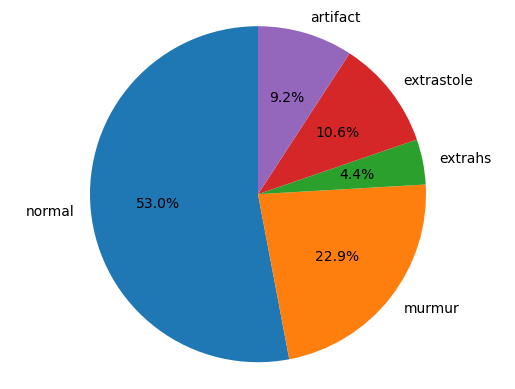

In [56]:
#@title Data distribution
num_normal = num_normal_a + num_normal_b
num_murmur = num_murmur_a + num_murmur_b

num_classes = [num_normal, num_murmur, num_extrahs, num_extrastole, num_artifact]
tags = ['normal', 'murmur', 'extrahs', 'extrastole', 'artifact']

# Pie diagram
plt.pie(num_classes, labels=tags, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.show()

#### Dataset A

##### Normal Sound (normal)

In [61]:
#@title Normal Heartbeat Sound
folder_path = folder_paths_a.get('normal')
file_names = os.listdir(folder_path)
random_file = random.choice(file_names)

file_path = os.path.join(folder_path, random_file)
normal_audio, normal_sr = librosa.load(file_path, sr=None)

# play audio
Audio(normal_audio, rate=normal_sr)

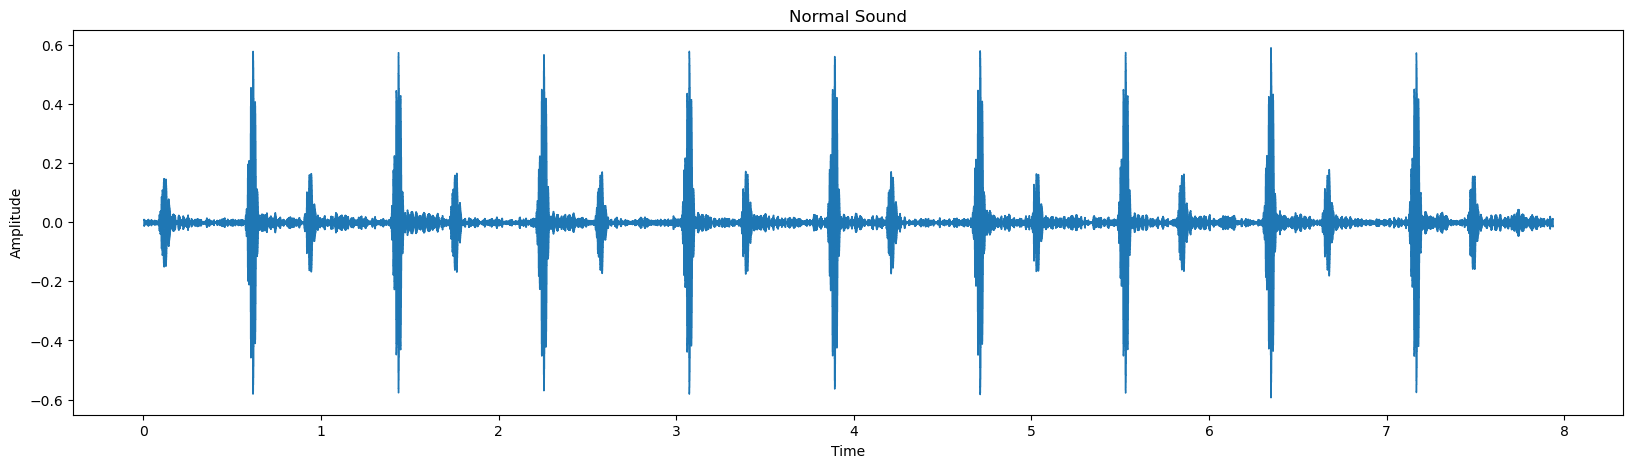

In [62]:
#@title Normal Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(normal_audio, sr=normal_sr)
plt.title("Normal Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [63]:
print(random_file)

201108011112.wav


##### Murmur Sound (murmur)

In [59]:
#@title Murmur Heartbeat Sound
folder_path = folder_paths_a.get('murmur')
file_names = os.listdir(folder_path)
random_file = random.choice(file_names)

file_path = os.path.join(folder_path, random_file)
murmur_audio, murmur_sr = librosa.load(file_path, sr=None)

# play audio
Audio(murmur_audio, rate=murmur_sr)

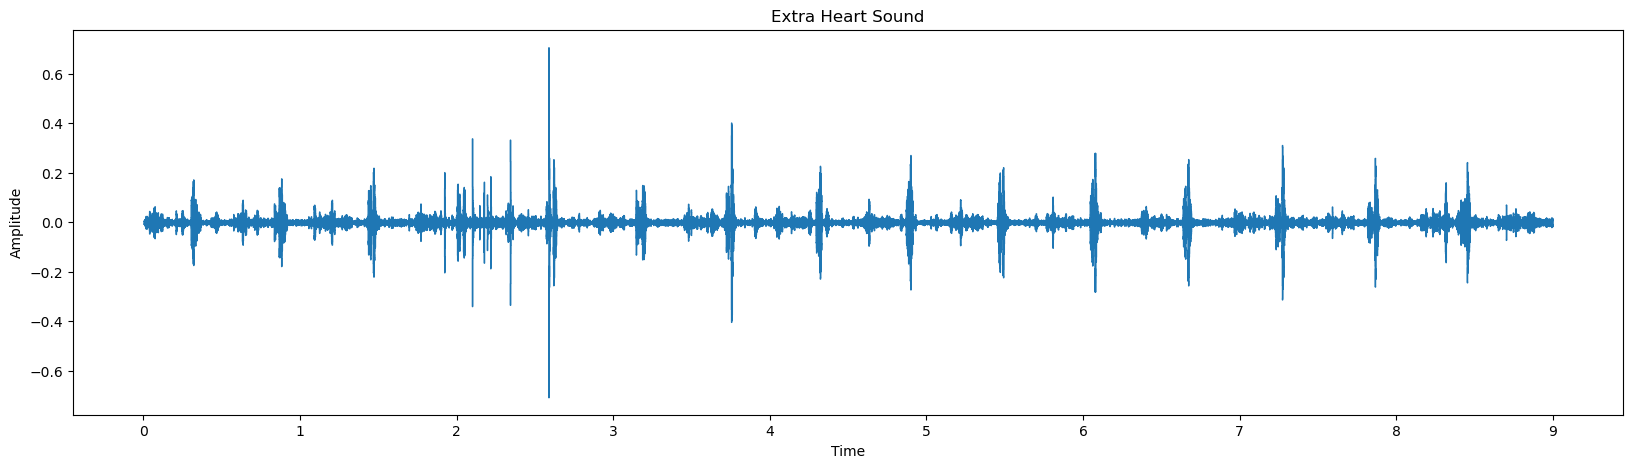

In [60]:
#@title Murmur Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(murmur_audio, sr=murmur_sr)
plt.title("Extra Heart Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

##### Extra Heart Sound (extrahs)

In [64]:
#@title Extra Heart Sound
folder_path = folder_paths_a.get('extrahs')
file_names = os.listdir(folder_path)
random_file = random.choice(file_names)

file_path = os.path.join(folder_path, random_file)
extrahs_audio, extrahs_sr = librosa.load(file_path, sr=None)

# play audio
Audio(extrahs_audio, rate=extrahs_sr)

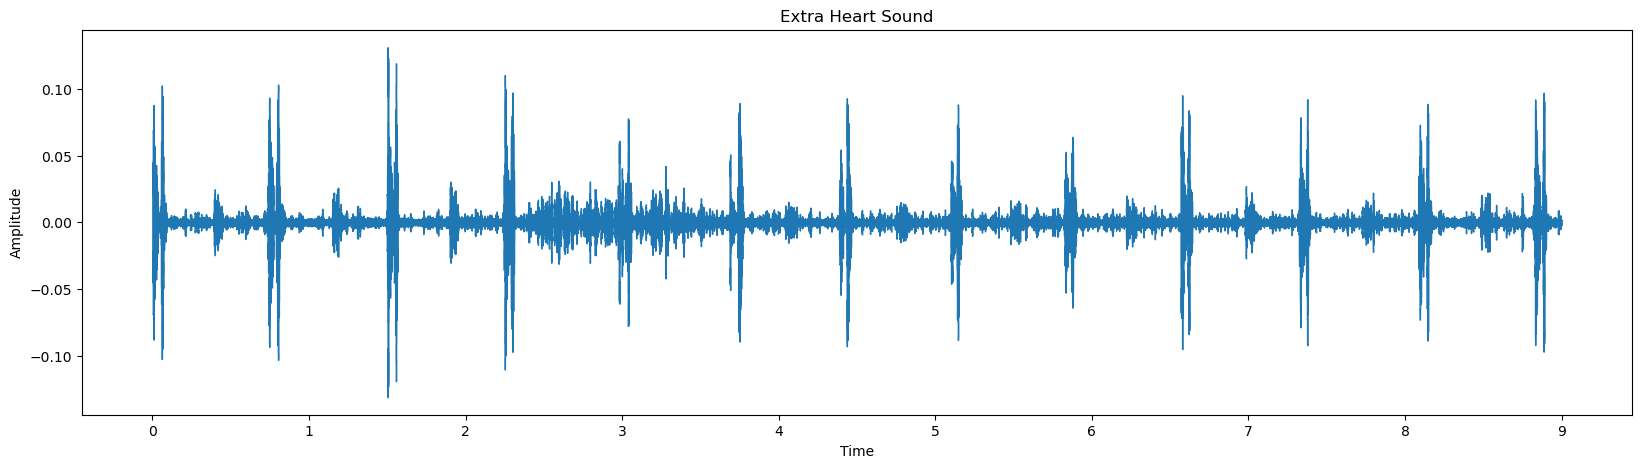

In [65]:
#@title Extra Heart Sound Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(extrahs_audio, sr=extrahs_sr)
plt.title("Extra Heart Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

##### Artifact Sound (artifact)

In [66]:
#@title Artifact sound
folder_path = folder_paths_a.get('artifact')
file_names = os.listdir(folder_path)
random_file = random.choice(file_names)

file_path = os.path.join(folder_path, random_file)
artifact_audio, artifact_sr = librosa.load(file_path, sr=None)

# play audio
Audio(artifact_audio, rate=artifact_sr)

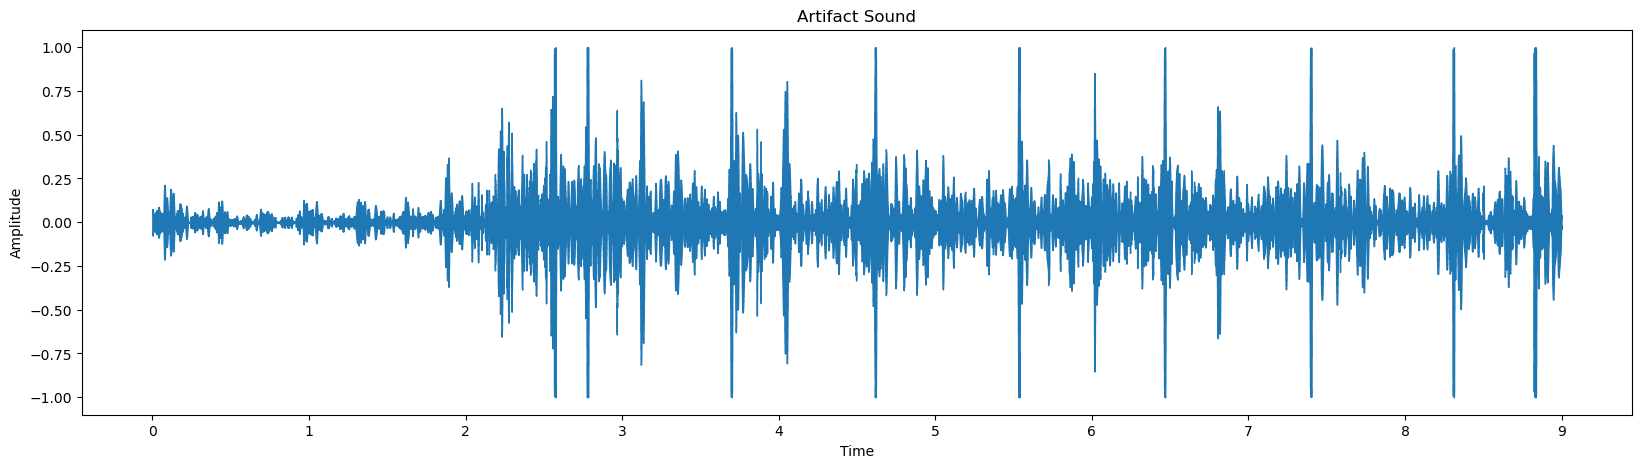

In [67]:
#@title Artifact Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(artifact_audio, sr=artifact_sr)
plt.title("Artifact Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

#### Dataset B

##### Normal Sound (normal)

In [68]:
#@title Normal Heartbeat
folder_path = folder_paths_b.get('normal')
file_names = os.listdir(folder_path)
random_file = random.choice(file_names)

file_path = os.path.join(folder_path, random_file)
normal_b_audio, normal_b_sr = librosa.load(file_path, sr=None)

# play audio
Audio(normal_b_audio, rate=normal_b_sr)

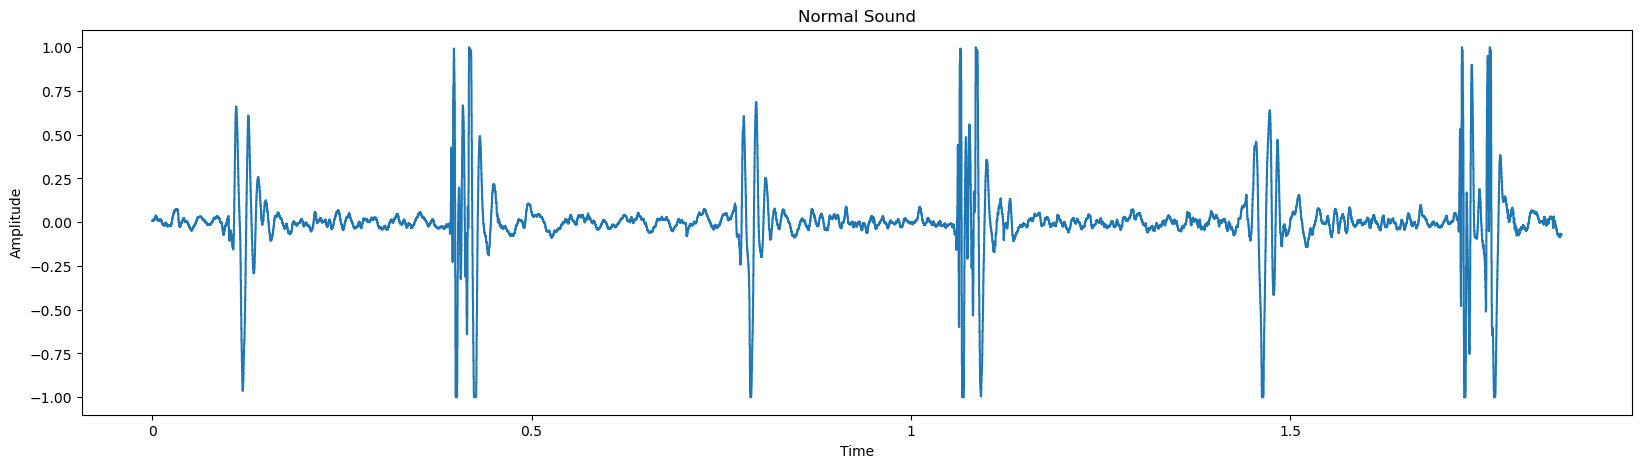

In [69]:
#@title Normal Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(normal_b_audio, sr=normal_b_sr)
plt.title("Normal Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

##### Murmur Sound (murmur)

In [73]:
#@title Murmur Heartbeat Sound
folder_path = folder_paths_b.get('murmur')
file_names = os.listdir(folder_path)
random_file = random.choice(file_names)

file_path = os.path.join(folder_path, random_file)
murmur_b_audio, murmur_b_sr = librosa.load(file_path, sr=None)

# play audio
Audio(murmur_b_audio, rate=murmur_b_sr)

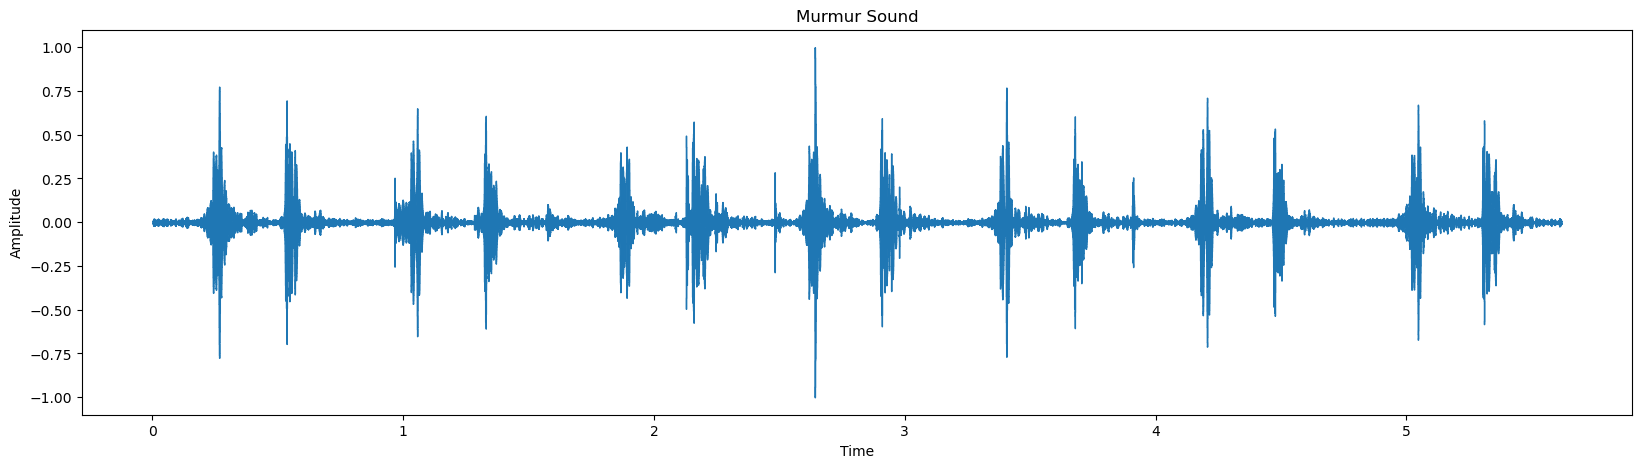

In [74]:
#@title Murmur Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(murmur_b_audio, sr=murmur_b_sr)
plt.title("Murmur Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

##### Extrasystole Sound (extrastole)

In [75]:
#@title Extrasistole Heartbeat Sound
folder_path = folder_paths_b.get('extrastole')
file_names = os.listdir(folder_path)
random_file = random.choice(file_names)

file_path = os.path.join(folder_path, random_file)
extrastole_audio, extrastole_sr = librosa.load(file_path, sr=None)

# play audio
Audio(extrastole_audio, rate=extrastole_sr)

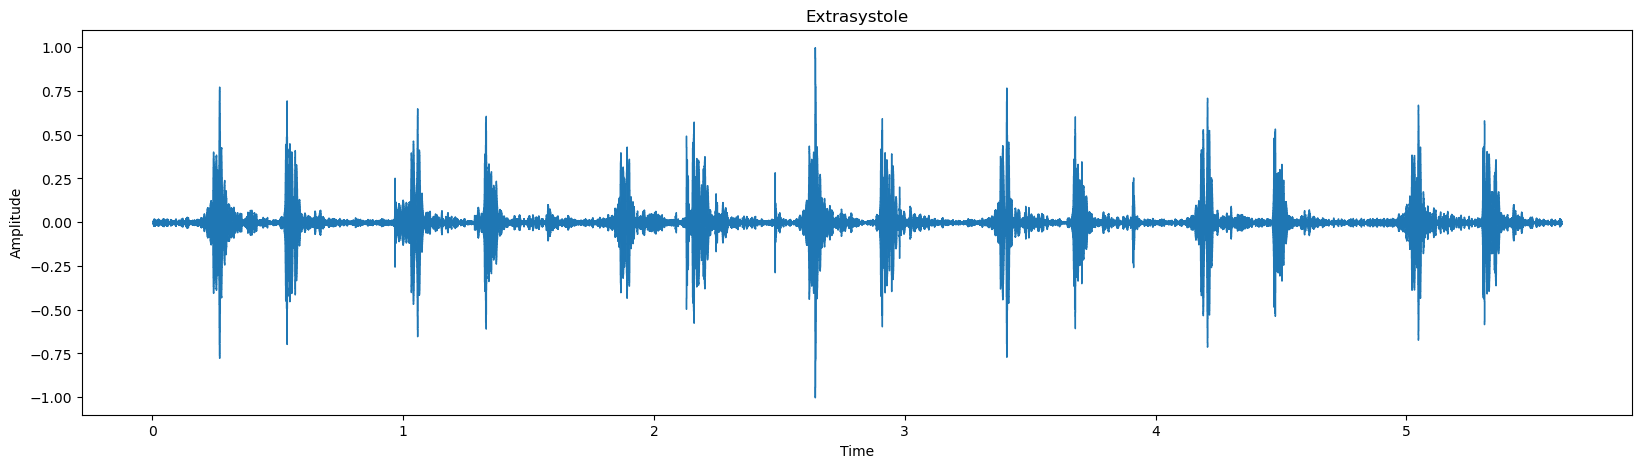

In [76]:
#@title Extrasystole Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(murmur_b_audio, sr=murmur_b_sr)
plt.title("Extrasystole")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Data Preprossecing